## Data Import 

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

In [164]:
data = pd.read_csv('House_Price.csv')

In [165]:
data.shape

(1460, 81)

In [166]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Feature Processing 

In [167]:
object_column = data.select_dtypes(include = ['object']).columns.tolist()

In [168]:
object_column

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [169]:
def one_hot_encoding(data, column_name):

    oh_enc = OneHotEncoder()
    oh_enc.fit(data[[column_name]])
    dummies = pd.DataFrame(oh_enc.transform(data[[column_name]]).todense(), columns=oh_enc.get_feature_names_out(), index = data.index)
    data = data.drop(column_name, axis = 1)

    return data.join(dummies)

In [170]:
for column in object_column:
    data = one_hot_encoding(data, column)

<AxesSubplot:>

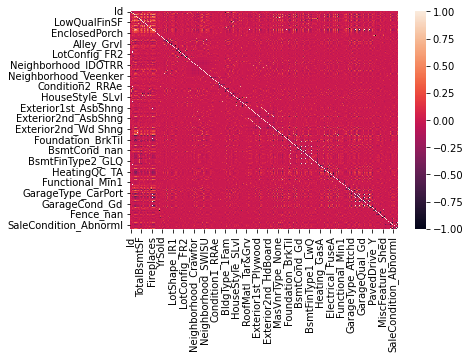

In [171]:
sns.heatmap(data.corr())

In [173]:
df_corr = data.corr()
columns = np.full((df_corr.shape[0],), True, dtype=bool)
data.shape[1]

306

In [174]:
threshold = 0.7

df_corr = data.corr()

columns = np.full((df_corr.shape[0],), True, dtype=bool)

for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False


selected_columns = data.columns[~columns]
high_correlation = data[selected_columns]

In [175]:
absolute_corr = np.abs(df_corr["SalePrice"])
df_corr["SalePrice"][absolute_corr > 0.5]

OverallQual       0.790982
YearBuilt         0.522897
YearRemodAdd      0.507101
TotalBsmtSF       0.613581
1stFlrSF          0.605852
GrLivArea         0.708624
FullBath          0.560664
TotRmsAbvGrd      0.533723
GarageCars        0.640409
GarageArea        0.623431
SalePrice         1.000000
ExterQual_TA     -0.589044
BsmtQual_Ex       0.553105
KitchenQual_Ex    0.504094
KitchenQual_TA   -0.519298
Name: SalePrice, dtype: float64

In [176]:
selected_columns

Index(['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice',
       'Neighborhood_Somerst', 'HouseStyle_2Story', 'RoofStyle_Shed',
       'RoofMatl_Tar&Grv', 'Exterior2nd_AsbShng', 'Exterior2nd_CBlock',
       'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
       'Exterior2nd_Plywood', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'BsmtQual_nan', 'BsmtCond_nan',
       'BsmtExposure_nan', 'BsmtFinType1_nan', 'BsmtFinType2_nan',
       'Electrical_Mix', 'GarageFinish_nan', 'GarageQual_nan', 'GarageCond_Ex',
       'GarageCond_TA', 'GarageCond_nan', 'MiscFeature_Gar2',
       'MiscFeature_TenC', 'SaleCondition_Partial'],
      dtype='object')

In [177]:
high_correlation.corr()

,1stFlrSF,TotRmsAbvGrd,GarageYrBlt,GarageArea,SalePrice,Neighborhood_Somerst,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_Tar&Grv,Exterior2nd_AsbShng,...,BsmtFinType2_nan,Electrical_Mix,GarageFinish_nan,GarageQual_nan,GarageCond_Ex,GarageCond_TA,GarageCond_nan,MiscFeature_Gar2,MiscFeature_TenC,SaleCondition_Partial
1stFlrSF,1.000000,0.409516,0.233449,0.489782,0.605852,-0.018495,-0.269813,0.017622,0.071021,-0.063332,...,-0.018376,-0.005801,-0.154846,-0.154846,-0.032741,0.186819,-0.154846,-0.000300,0.015539,0.221037
TotRmsAbvGrd,0.409516,1.000000,0.148112,0.337822,0.533723,-0.015275,0.430930,0.033786,-0.013142,0.002335,...,-0.012382,-0.008343,-0.088285,-0.088285,-0.045995,0.072106,-0.088285,0.045183,0.088332,0.142032
GarageYrBlt,0.233449,0.148112,1.000000,0.564567,0.486362,0.277452,0.186831,-0.000782,-0.050926,-0.136388,...,-0.070103,-0.063858,NaN,NaN,0.013116,0.275846,NaN,-0.015451,-0.000552,0.349327
GarageArea,0.489782,0.337822,0.564567,1.000000,0.623431,0.184533,0.137946,0.020798,-0.006663,-0.092541,...,-0.075543,-0.016534,-0.536333,-0.536333,0.024090,0.485444,-0.536333,-0.003896,0.011149,0.294714
SalePrice,0.605852,0.533723,0.486362,0.623431,1.000000,0.140058,0.242880,0.020557,0.004921,-0.099220,...,-0.145274,-0.037555,-0.236832,-0.236832,-0.026546,0.275872,-0.236832,-0.004744,0.022773,0.352060
Neighborhood_Somerst,-0.018495,-0.015275,0.277452,0.184533,0.140058,1.000000,0.144012,-0.009266,-0.021798,-0.029484,...,-0.040898,-0.006550,-0.060634,-0.060634,-0.009266,0.079531,-0.060634,-0.009266,-0.006550,0.266552
HouseStyle_2Story,-0.269813,0.430930,0.186831,0.137946,0.242880,0.144012,1.000000,-0.024524,-0.023277,-0.026829,...,-0.070859,-0.017335,-0.075975,-0.075975,-0.024524,0.055878,-0.075975,-0.024524,0.039539,0.042015
RoofStyle_Shed,0.017622,0.033786,-0.000782,0.020798,0.020557,-0.009266,-0.024524,1.000000,-0.003227,-0.004365,...,-0.006054,-0.000970,-0.008976,-0.008976,-0.001372,0.011774,-0.008976,0.499314,-0.000970,-0.011333
RoofMatl_Tar&Grv,0.071021,-0.013142,-0.050926,-0.006663,0.004921,-0.021798,-0.023277,-0.003227,1.000000,-0.010268,...,0.035505,-0.002281,0.013485,0.013485,-0.003227,-0.054606,0.013485,-0.003227,-0.002281,0.001648
Exterior2nd_AsbShng,-0.063332,0.002335,-0.136388,-0.092541,-0.099220,-0.029484,-0.026829,-0.004365,-0.010268,1.000000,...,0.017744,-0.003085,0.074403,0.074403,-0.004365,-0.146222,0.074403,-0.004365,-0.003085,-0.036062


/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


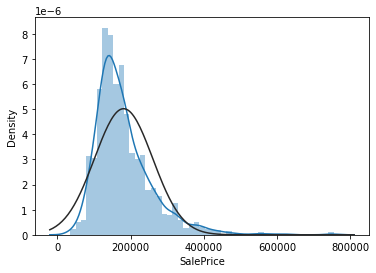

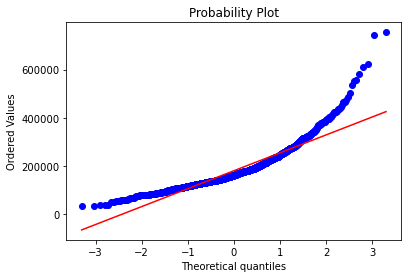

In [178]:
from scipy.stats import norm
sns.distplot(data['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

/srv/conda/envs/notebook/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


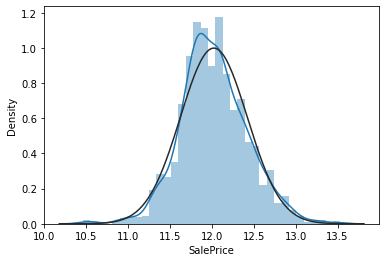

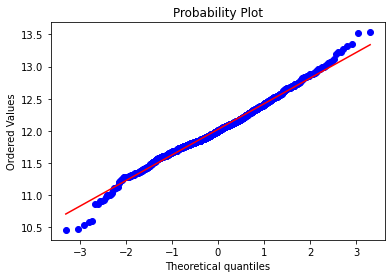

In [179]:
data['SalePrice'] = np.log(data['SalePrice'])
sns.distplot(data['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)

## Random Forest Model 

In [180]:
data = data.dropna()
X = data.drop(['SalePrice', 'Id'], axis = 'columns')
y = data['SalePrice']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train, y_train);

In [185]:
rf.feature_names_in_

array(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_C (all)', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl',
       'Street_Pave', 'Alley_Grvl', 'Alley_Pave', 'Alley_nan',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
      

In [230]:
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
a = dataframe[dataframe[0] > .001]
a = a.rename(columns = {0: 'values'})
b = a.sort_values('values', ascending = True)
b

,values
KitchenQual_Gd,0.001007
GarageType_Attchd,0.001080
Neighborhood_Crawfor,0.001083
KitchenQual_Ex,0.001084
BsmtFullBath,0.001149
ExterQual_Ex,0.001157
SaleCondition_Family,0.001234
BsmtQual_TA,0.001241
BedroomAbvGr,0.001308
KitchenQual_TA,0.001340


<BarContainer object of 45 artists>

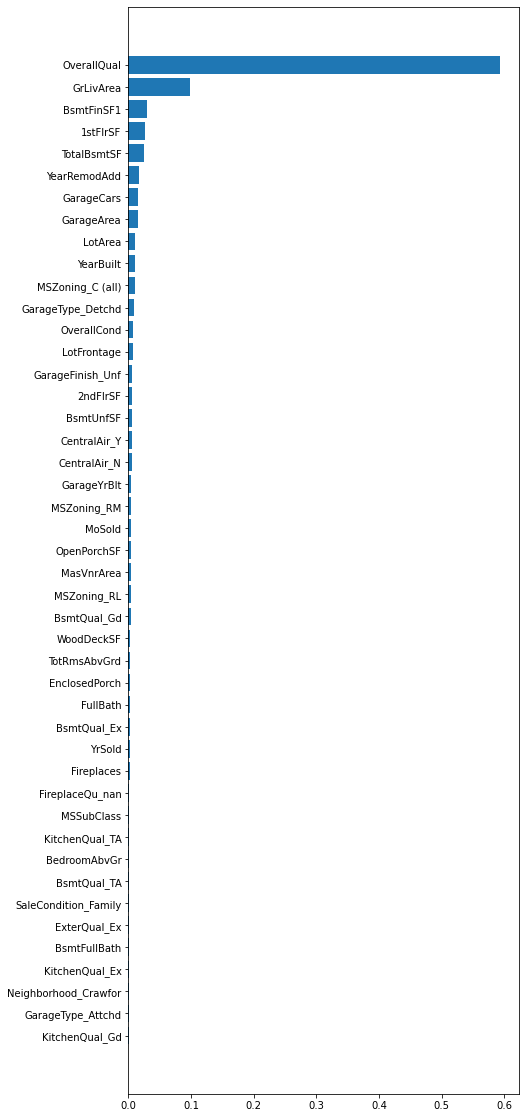

In [231]:
plt.figure(figsize=(7, 20))
plt.barh(b.index, b['values'])

In [233]:
dataframe = pd.DataFrame(rf.feature_importances_, rf.feature_names_in_)
c = dataframe[dataframe[0] > .01]
c = c.rename(columns = {0: 'values'})
d = c.sort_values('values', ascending = True)
d

,values
LotArea,0.010547
GarageArea,0.014594
GarageCars,0.014839
YearRemodAdd,0.017606
TotalBsmtSF,0.024523
1stFlrSF,0.026482
BsmtFinSF1,0.029265
GrLivArea,0.098635
OverallQual,0.593731


<BarContainer object of 9 artists>

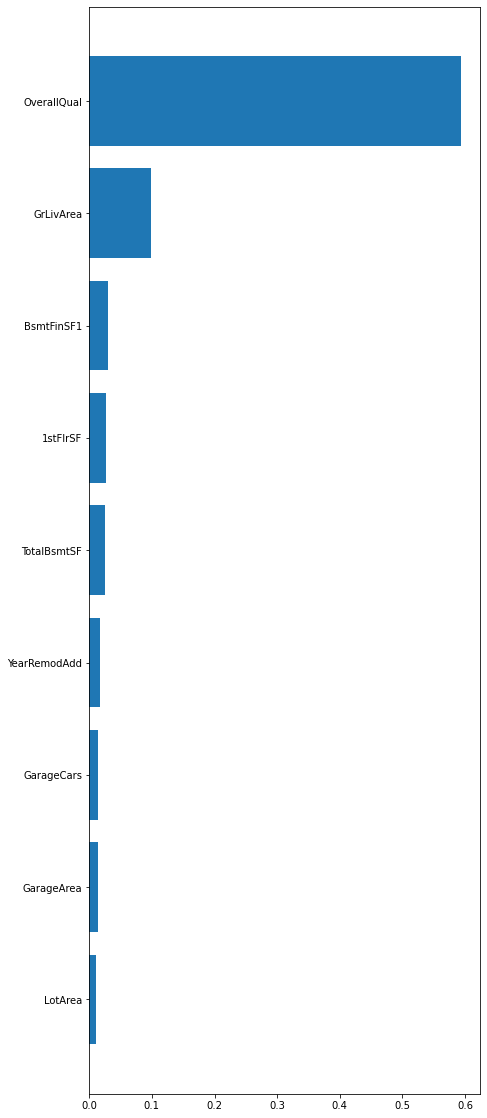

In [234]:
plt.figure(figsize=(7, 20))
plt.barh(d.index, d['values'])